# Stock Market Prediction using NLP over Reddit Data


In [ ]:
import numpy as np # linear algebra
import pandas as pd # for Accessing and preprocessing data 
#for vectorization of the Text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#Implementation of LogisticRegression
from sklearn.linear_model import LogisticRegression
#for the Implementation of SVM model
from sklearn.svm import LinearSVC
import nltk
#for the tokenization of words 
from nltk import word_tokenize
#for the Lemmatization Text
from nltk.stem import WordNetLemmatizer
from sklearn.svm import SVC, LinearSVC
from sklearn import tree
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
#for the plots of the data in notebook 
from matplotlib import pyplot as plt

from sklearn.metrics import classification_report
#for Accuracy measure we use confusion Matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

from keras.models import Sequential


/kaggle/input/stocknews/upload_DJIA_table.csv
/kaggle/input/stocknews/Combined_News_DJIA.csv
/kaggle/input/stocknews/RedditNews.csv


#  Dataset Explanation:


The data set is used from kaggle and the link of the data is https://www.kaggle.com/aaron7sun/stocknews. 
Two types of data provided in this dataset:
1.	News data: Browsed through Reddit World News Channel's historic news headlines. They are classified with the revised votes of the users, and just a single date is taken in the top 25 headlines.
2.	Stock Data: "Proving the idea" is based on the (DJIA).


In [ ]:
#Loading the data and storing in a variable redditData
redditData = pd.read_csv('content/stocknews/Combined_News_DJIA.csv')
redditData.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

1.	The column attribute is "date, and “news headlines." RedditNews.csv: 2 columns.
Every story is classified in terms of how hot they are from top to end
2.	DJIA table.csv: got from Yahoo Finance: see the website for additional information.
3.	CombinedNewsDJIA.csv: this combined dataset with different 27 features 
4.	The first column feature  is "Date," the second feature of the data in column is "Label," and the next column is "Top1" through "Top25


First, all titles are combined in a single column

In [ ]:
#titles are combined in a single column
redditData['headlines'] = redditData[redditData.columns[2:]].apply(lambda x: '. '.join(x.dropna().astype(str)),axis=1)

Histogram of the headline length

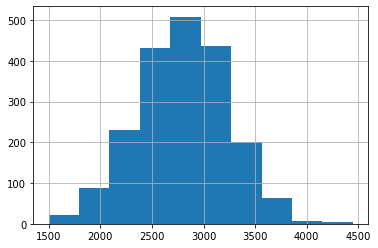

In [ ]:
#Plot of Histogram
redditData['comment_length'] = redditData['headlines'].apply(lambda x : len(x))
redditData['comment_length'].hist()

Distribution of labels

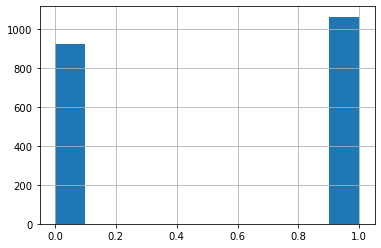

In [ ]:
#Divide the data into lables 
redditData['Label'].hist()

Divide the data across the train and test set. This is about 80%/20% divided.

In [ ]:
trainData = redditData[redditData['Date'] < '2015-01-01']
testData = redditData[redditData['Date'] > '2014-12-31']

# Tf-idf and implementation of Simple classification

The phrases were played into words by using the RegexpTokenizer nltk, starting from the daily headlines. There is also an application of lemmatization. This is the responsibility of the following CustomTokenizer. T

In [ ]:
nltk.download('stopwords', quiet=True, raise_on_error=True)
stop_words_en = set(nltk.corpus.stopwords.words('english'))
stop_words_en.add("b")
#Class defination of custom Tokenization 
class CustomTokenizer:
    
    def __init__(self):
        self.wnl = WordNetLemmatizer()
        self.tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
        
    def _lem(self, token):
        if (token in stop_words_en):
            return token  # Solves error ."
        return self.wnl.lemmatize(token)
    
    def __call__(self, doc):
        return [self._lem(t) for t in self.tokenizer.tokenize(doc)]

he TfidfVectorizer converts the raw headlines into a TF-IDF feature matrix with the CustomTokenizer.
● English stop words are deleted, words are transformed from upper case to lowercase. 
● The ngram_range are taken into account
● Min_df Ignore words with strictly higher document frequency than the particular threshold the training dataset used for vectorization.

In [ ]:
vectorizer = CountVectorizer(tokenizer=CustomTokenizer(), stop_words=stop_words_en, lowercase=True, min_df=0.0075,  max_df=0.05, ngram_range=(2,2))

featuresTrainData = vectorizer.fit_transform(trainData['headlines'].tolist())
featuresTestData = vectorizer.transform(testData['headlines'].tolist())

Inspect the name and characteristics of the TF-IDF

In [ ]:
feature_names = vectorizer.get_feature_names()
print(feature_names[50:100])
#Storing that data into Xtrain and xtest variables so we can use the data for the traininng and testing the model.
X_train = pd.DataFrame(featuresTrainData.todense(), columns = feature_names)
X_test = pd.DataFrame(featuresTestData.todense(), columns = feature_names)
#Showing the data again
X_train.head()

['250 000', '3 000', '3 billion', '3 day', '3 million', '3 year', '30 000', '30 million', '30 year', '300 000', '300 million', '4 000', '4 5', '4 billion', '4 day', '4 million', '4 year', '40 000', '40 year', '48 hour', '5 000', '5 billion', '5 million', '5 year', '50 000', '50 million', '50 year', '500 000', '500 year', '6 000', '6 billion', '6 million', '6 month', '60 000', '60 year', '7 billion', '7 year', '70 000', '70 percent', '8 000', '8 year', '9 11', '9 year', 'abc news', 'abuse scandal', 'according new', 'according report', 'accuses u', 'acid attack', 'across country']


,000 000,000 dead,000 euro,000 troop,000 year,1 2,1 3,1 4,1 5,1 500,...,year since,year u,year world,york time,young child,young girl,young men,young people,young woman,yr old
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
from collections import defaultdict
#showing the data in unigrams 
up_unigrams = defaultdict(int)
down_unigrams = defaultdict(int)

for word in feature_names:
    up_unigrams[word] += np.sum(X_train[train['Label']==1][word])
    down_unigrams[word] += np.sum(X_train[train['Label']==0][word])
        
df_up_unigrams = pd.DataFrame(sorted(up_unigrams.items(), key=lambda x: x[1])[::-1])
df_down_unigrams = pd.DataFrame(sorted(down_unigrams.items(), key=lambda x: x[1])[::-1])
df_up_unigrams.head()

,0,1
0,islamic state,73
1,world cup,60
2,bin laden,51
3,supreme court,50
4,right group,50


Some Common Headlines of the data

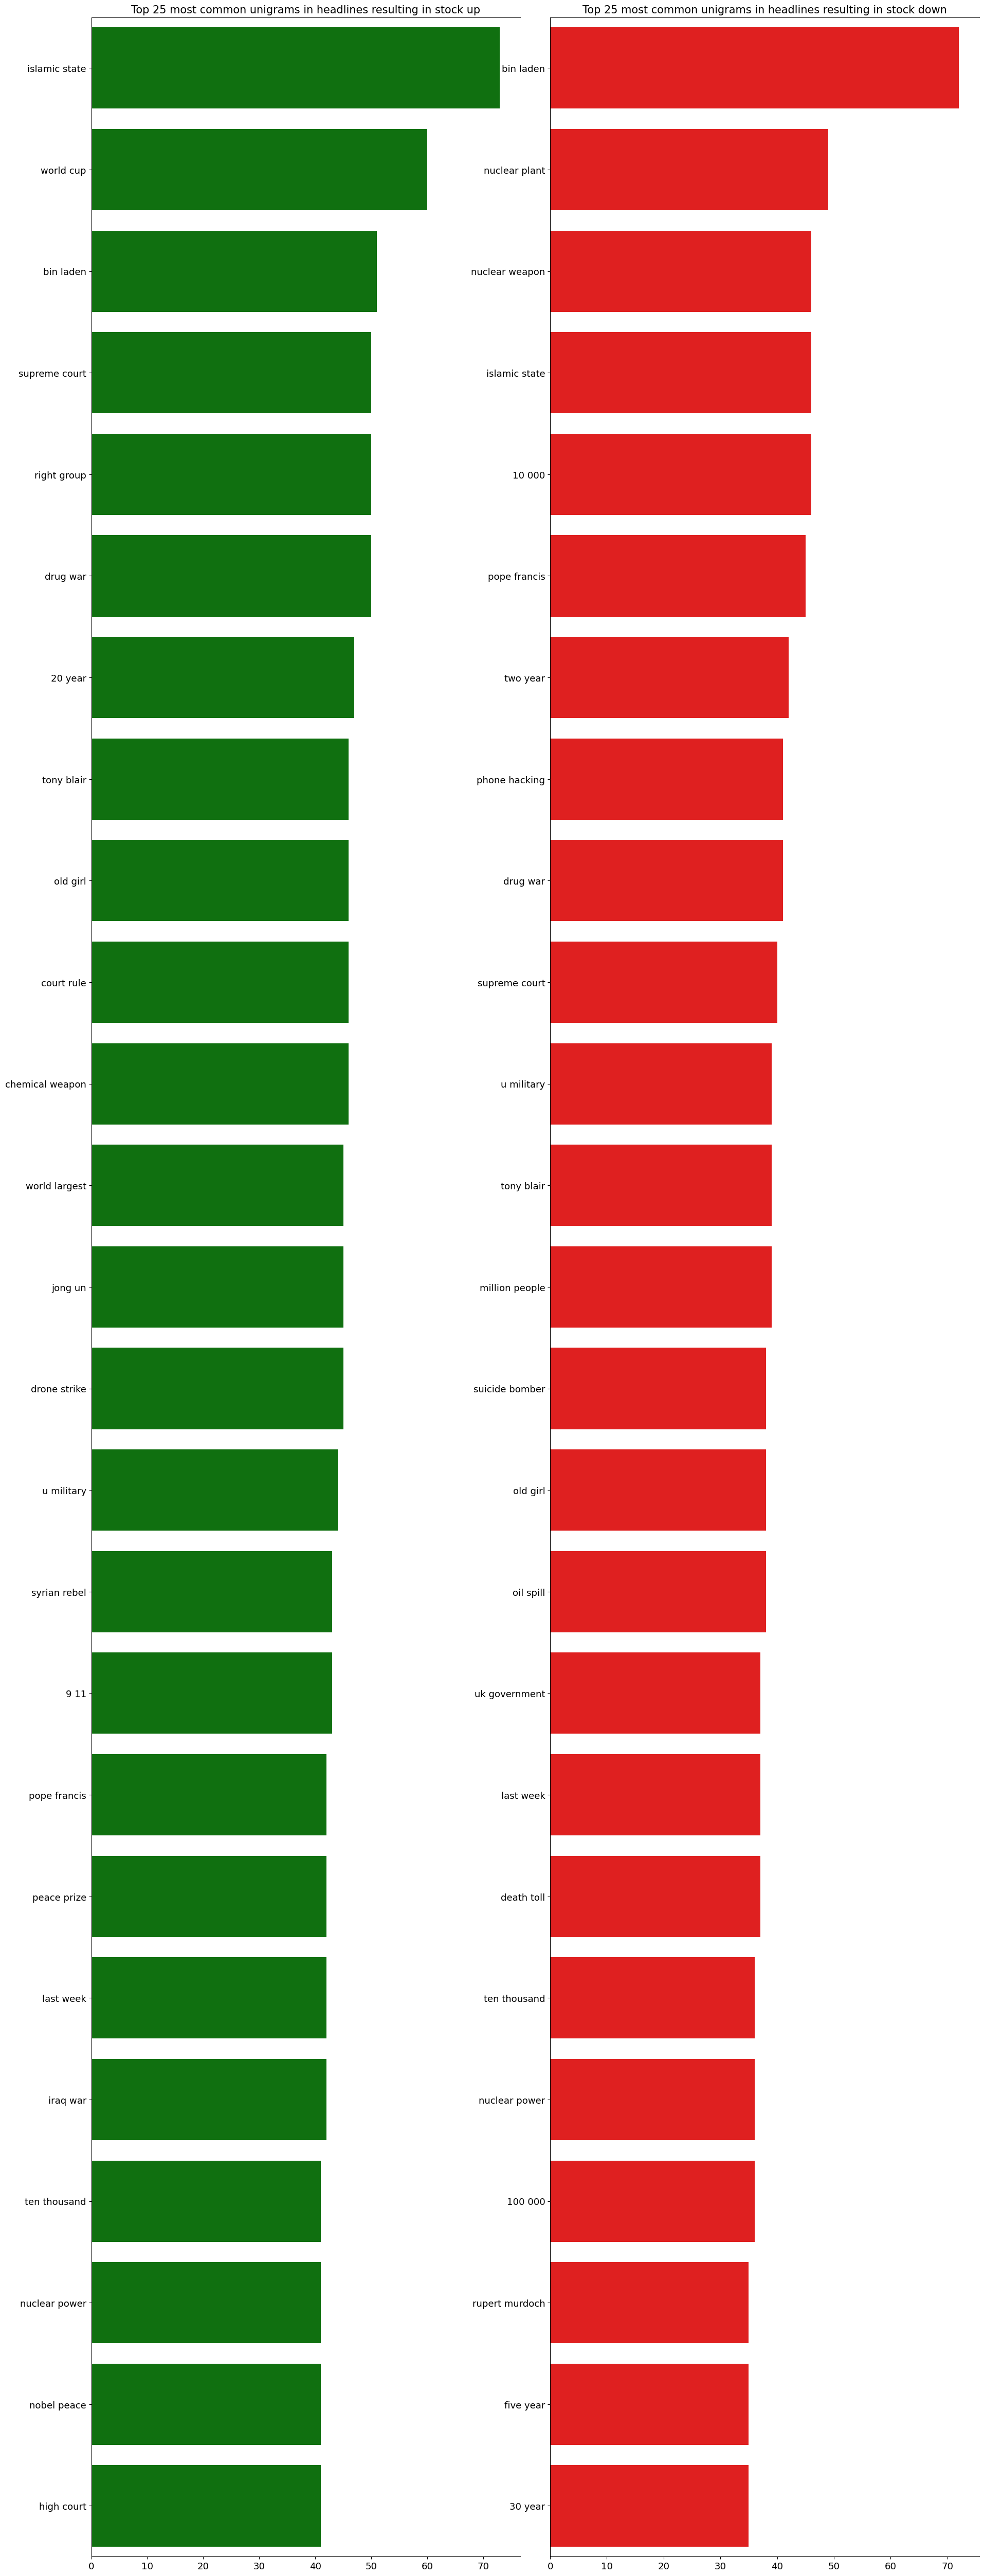

In [ ]:
import seaborn as sns

N=25

fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_up_unigrams[0].values[:N], x=df_up_unigrams[1].values[:N], ax=axes[0], color='green')
sns.barplot(y=df_down_unigrams[0].values[:N], x=df_down_unigrams[1].values[:N], ax=axes[1], color='red')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in headlines resulting in stock up', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in headlines resulting in stock down', fontsize=15)

plt.show()

Prediction of Test Data using support vector classifier

In [ ]:
#Implementation of Support Vector classifier 
clf = SVC()
clf = clf.fit(X_train, train["Label"].tolist())
print('Accuracy X_train: ' + str(clf.score(X_train, train["Label"].tolist())))
#Prediting the price 
predictions = clf.predict(X_test)

pd.crosstab(test["Label"], predictions, rownames=["Actual"], colnames=["Predicted"])

Accuracy X_train: 0.9621353196772191


Predicted,0,1
Actual,,
0,36,150
1,30,162


Confusion Matrix

In [ ]:
#confusion matrix for the accuracy measure 
print (classification_report(test["Label"], predictions))
print ('Accuracy X_test: ' + str(accuracy_score(test["Label"], predictions)))


              precision    recall  f1-score   support

           0       0.55      0.19      0.29       186
           1       0.52      0.84      0.64       192

    accuracy                           0.52       378
   macro avg       0.53      0.52      0.46       378
weighted avg       0.53      0.52      0.47       378

Accuracy X_test: 0.5238095238095238


# Implementation of Keras Sequential model:
There is a sequence and functionality of two approaches to construct Keras models. For most situations, the sequential API enables you to construct layer-by-layer models. The fact that you can not construct models which share layers or have many inputs or outputs is restricted.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 9760      
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 9,778
Trainable params: 9,778
Non-trainable params: 0
_________________________________________________________________
None


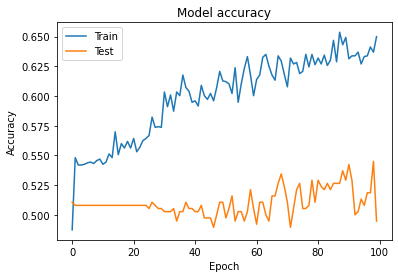

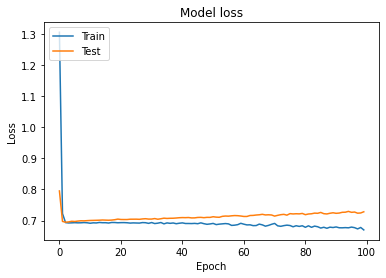

12/12 [==============================] - 0s 1ms/step - loss: 0.7282 - accuracy: 0.4947
[0.7281633615493774, 0.49470898509025574]


In [ ]:
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adadelta,Adam,RMSprop
from keras.utils import np_utils
from keras import Sequential, optimizers, regularizers

scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean = np.mean(X_train)
X_train -= mean
X_test -= mean

num_features = X_train.shape[1]
#Implementation of Sequential Model
model = Sequential()
model.add(Dense(8,input_shape=(num_features,), activation='relu', kernel_regularizer = regularizers.l2(0.1)))
model.add(Dropout(0.5))
#model.add(Dense(32, activation='relu', kernel_regularizer = regularizers.l2(0.001)))
#model.add(Dropout(0.5))
#model.add(Dense(32, activation='relu', kernel_regularizer = regularizers.l2(0.0001)))
#model.add(Dropout(0.5))
#model.add(Dense(32, activation='relu', kernel_regularizer = regularizers.l2(0.1)))
#model.add(Dropout(0.5))
#model.add(Dense(128, activation='relu', kernel_regularizer = regularizers.l2(0.001)))
#model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Y_train = np_utils.to_categorical(train["Label"], 2)
Y_test = np_utils.to_categorical(test["Label"], 2)

history = model.fit(X_train, Y_train, batch_size=32, validation_data=(X_test, Y_test), epochs=100, verbose=0)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
    
score = model.evaluate(X_test, Y_test)
print(score)

Model precisions are defined as the number of classifications that are split by the total number of predictions that a model properly forecasts. It is a technique to evaluate the achievement of a model, but definitely not the only way

Loss is the fine for a wrong forecast. That is to say, loss is a number which shows how terrible the forecast of the model was with one sample. If the forecast of the model is perfect, the loss must be zero, otherwise the loss shall be larger. The objective of the model training is to identify,

# Implementation of Word2Vec

Use Word2Vec to find most similar words

In [ ]:
class MyTokenizer():
    def __init__(self):
        self.tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
        self.lemmatizer = nltk.stem.WordNetLemmatizer()
        self.stop_words_en = set(nltk.corpus.stopwords.words('english'))
        self.stop_words_germ = set(nltk.corpus.stopwords.words('german'))
        self.stop_words = set()
        self.stop_words.add("b")
        
    def tokenize(self, headlines):
        # Tokenize
        tokens = [self.tokenizer.tokenize(article) for article in headlines]

        # Lemmatizer
        clean_tokens = []
        for words in tokens:
            clean_tokens.append([self.lemmatizer.lemmatize(word) for word in words])

        # Stop words
        final_tokens = []
        for words in clean_tokens:
            final_tokens.append([word.lower() for word in words if word.lower() not in self.stop_words_en and word.lower() not in self.stop_words_germ and word.lower() not in self.stop_words])
            
        return final_tokens

In [ ]:
from gensim.models import Word2Vec

tokenizer = MyTokenizer()

headlines_train = train["headlines"]
headlines_test= test["headlines"]

tokens_train = tokenizer.tokenize(headlines_train)
tokens_test = tokenizer.tokenize(headlines_test)

model = Word2Vec(tokens_train, min_count=1,size= 50,workers=3, window =3, sg = 1)

word_vectors = model.wv
print("Number of word vectors: {}".format(len(word_vectors.vocab)))

print(model.wv.most_similar('husband'))

Number of word vectors: 29909
[('abusing', 0.9775549173355103), ('minor', 0.9760563969612122), ('murdering', 0.972906768321991), ('hanged', 0.9712677001953125), ('abused', 0.9699116349220276), ('repeatedly', 0.9688902497291565), ('adultery', 0.9687996506690979), ('attempted', 0.967660665512085), ('assaulted', 0.9674355983734131), ('rapist', 0.9670854806900024)]


# Implementation of Word embedding

Number of words: 20000
max_length: 200
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 16)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 34        
Total params: 320,978
Trainable params: 320,978
Non-trainable params: 0
_________________________________________________________________
None


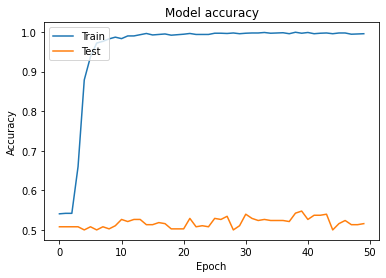

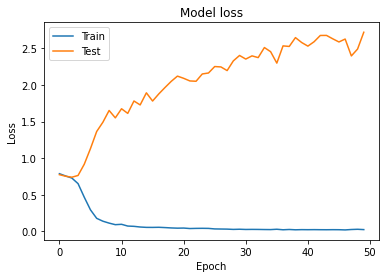

12/12 [==============================] - 0s 22ms/step - loss: 2.7192 - accuracy: 0.5159
Testing Accuracy is 51.58730149269104 


In [ ]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from keras.layers import Flatten, Dense, LSTM, GRU, SpatialDropout1D, Bidirectional, concatenate
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import SGD

my_tokenizer = MyTokenizer()

headlines_train = train["headlines"]
headlines_test= test["headlines"]
tokens_train = my_tokenizer.tokenize(headlines_train)
tokens_test = my_tokenizer.tokenize(headlines_test)

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(train["headlines"])
        
vocab_size = 20000 #len(tokenizer.word_index) + 1
print('Number of words: ' + str(vocab_size))

X_train_tokens = tokenizer.texts_to_sequences(tokens_train)
X_test_tokens = tokenizer.texts_to_sequences(tokens_test)

max_length = 0
for words in X_train_tokens:
    if len(words)>max_length:
        max_length = len(words)
max_length = 200
print('max_length: ' + str(max_length))

X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_length, padding='post')

y_train = train['Label']
y_test = test['Label']
Y_train = np_utils.to_categorical(y_train, 2)
Y_test = np_utils.to_categorical(y_test, 2)

model = Sequential()
model.add(Embedding(vocab_size, 16, input_length=max_length))
#model.add(SpatialDropout1D(0.5))
model.add(LSTM(8, dropout=0.2, recurrent_dropout=0.2)) 
#model.add(Bidirectional(LSTM(units=64, recurrent_dropout=0.5)))
#model.add(Flatten())
#model.add(Dense(32, activation='relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_regularizer = regularizers.l2(0.01)))
#model.add(Dropout(0.5))
#model.add(Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.001)))
#model.add(Dropout(0.5))
#model.add(GRU(units=32, dropout=0.5, recurrent_dropout=0.5))
#model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train_pad, Y_train, batch_size=32, epochs=50, verbose=0, validation_data=(X_test_pad, Y_test))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

loss, accuracy = model.evaluate(X_test_pad,Y_test)
print('Testing Accuracy is {} '.format(accuracy*100))

#7 Conclusion:#
We have predicted stock market price using Reddit data and applied different natural language processing techniques to predict to high and low market prices. The accuracy of the models is slightly low because the models is dependent on news of market data and we don’t have time series data or some real numeric data. We can also improve the accuracy of prediction prices using other Machine learning and deep learning models but I used NLP techniques over them which was basic goal of this course.
